In [162]:
%load_ext autotime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv1D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 999 µs


In [163]:
temp=pd.read_csv('trimmedData.csv')

time: 739 ms


In [164]:
X=temp['X']
X=X.values.reshape(-1,1)
Y=temp['Y']

time: 999 µs


In [165]:
gtemp=temp.groupby('Y')
#initializing y


time: 1e+03 µs


In [166]:
#dividing all on the basis of their label
#get_group(1) reutrns the group with y label 1
g1=gtemp.get_group(1) 
g2=gtemp.get_group(2)
g32=gtemp.get_group(32)
g37=gtemp.get_group(37)
g38=gtemp.get_group(38)

time: 51 ms


In [167]:
#n_features =1 (amplitude)
y=[]
n_features=1
#initialise total data point to 0
totaldp=0
#window size =250 ==1 sec
window=250

#get amplitude values from X
X=g1['X']
#number of data points = number of rows in X / window
data_points=X.shape[0]//window
#appending y 
y=np.append(y,[1]*data_points)
#updating total datapoints
totaldp+=data_points
#removing left points
X=X.head(data_points*window)
#converting to array
X=np.array(X)
#reshaping it to data_points,window,n_features(n,250,1)
X=np.reshape(X,((data_points,window,n_features)))
#grouped X is the new amplitude chunk
groupedX=X

#same procedure for label 2
X=g2['X']
data_points=X.shape[0]//window
y=np.append(y,[2]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)

#same procedure for label 32
X=g32['X']
data_points=X.shape[0]//window
y=np.append(y,[32]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)


X=g37['X']
data_points=X.shape[0]//window
y=np.append(y,[37]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)


X=g38['X']
data_points=X.shape[0]//window
y=np.append(y,[38]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)


groupedX=np.reshape(groupedX,((totaldp,window)))

time: 17 ms


In [168]:
np.mean(groupedX[2000])
me=np.mean(groupedX,axis=1)
groupedX=(groupedX.T-me).T
np.mean(groupedX[2000])
x=groupedX

time: 5 ms


In [86]:
encoding_dim = 20
 
# this is our input placeholder
input_img = Input(shape=(250,))
# "encoded" is the encoded representation of the input
encoded0=Dense(125,activation='linear')(input_img)
encoded1=Dense(60,activation='linear')(encoded0)
encoded = Dense(encoding_dim, activation='linear')(encoded1)
# "decoded" is the lossy reconstruction of the input
decoded0=Dense(60,activation='linear')(encoded)
decoded1=Dense(125,activation='linear')(decoded0)
decoded = Dense(250, activation='linear')(decoded1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (10-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]
# create the decoder model
decoder_layer1 = autoencoder.layers[-1]
decoder_layer2 = autoencoder.layers[-2]
encoded_input1 = Input(shape=(125,))
encoded_input2 = Input(shape=(60,))
decoder1 = Model(encoded_input1, decoder_layer1(encoded_input1))
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mse')#binary_crossentropy

time: 67 ms


In [108]:
autoencoder.fit(x,x,
epochs=50,
batch_size=10)

Epoch 1/50
2628/2628 [==============================] - 1s 217us/step - loss: 95318.5974
Epoch 2/50
2628/2628 [==============================] - 0s 99us/step - loss: 79309.3373
Epoch 3/50
2628/2628 [==============================] - 0s 96us/step - loss: 170984.6326
Epoch 4/50
2628/2628 [==============================] - 0s 97us/step - loss: 231321.8999
Epoch 5/50
2628/2628 [==============================] - 0s 95us/step - loss: 3175978.1527
Epoch 6/50
2628/2628 [==============================] - 0s 91us/step - loss: 503161.4238
Epoch 7/50
2628/2628 [==============================] - 0s 95us/step - loss: 674992.7744
Epoch 8/50
2628/2628 [==============================] - 0s 90us/step - loss: 420716.2100
Epoch 9/50
2628/2628 [==============================] - 0s 98us/step - loss: 173146.4427
Epoch 10/50
2628/2628 [==============================] - 0s 92us/step - loss: 93262.7741
Epoch 11/50
2628/2628 [==============================] - 0s 95us/step - loss: 70311.4260
Epoch 12/50
2628/2628

time: 12.9 s


In [109]:
encoded_layer=encoder.predict(x)
decoded_output1=decoder.predict(encoded_layer)
decoded_output2=decoder2.predict(decoded_output1)
# create the decoder model
decoded_output2=decoder1.predict(decoded_output2)


time: 326 ms


In [110]:
encoded_layer[0]

array([ -201.13594 ,  -448.96243 , -1320.8092  , -1475.579   ,
         619.8535  ,  1083.8254  ,   200.15804 ,   888.00354 ,
         249.1533  ,   686.55743 ,  -412.19226 ,  -571.05566 ,
         -43.532238,  2121.16    ,  -450.08148 ,  -472.45395 ,
        -535.2889  ,   934.7815  ,  -177.44304 ,   606.2001  ],
      dtype=float32)

time: 999 µs


In [111]:
print(x[0].shape)
print(decoded_output2[0].shape)

(250,)
(250,)
Error in callback <function LineWatcher.stop at 0x00000232988C8620> (for post_run_cell):


AssertionError: 

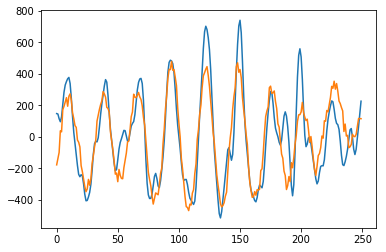

time: 93 ms


In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
q=306
plt.plot(range(250),x[q],label=1)
plt.plot(range(250),decoded_output2[q],label=2)

In [113]:
encoded_layer.shape

(2628, 20)

time: 999 µs


In [114]:
y.shape

(2628,)

time: 1e+03 µs


In [126]:
print(me[0])
groupedX=np.reshape(groupedX,((totaldp,window,1)))
X=groupedX
#max value of colomn (axis specifis row or colomn)
a=np.max(X,axis=1)
#concatinate with minimum, second axis is for concatinate into colomn
a=np.concatenate((a,np.min(X,axis=1)),axis=1)
a=np.concatenate((a,np.average(X,axis=1)),axis=1)
#standard deviation
a=np.concatenate((a,np.std(X,axis=1)),axis=1)
#fft real part
a=np.concatenate((a,np.real(np.fft.rfftn(X,axes=(0,1)))[:,0]),axis=1)
X=a
X.shape

-36801.04088


(2628, 5)

time: 32 ms


In [169]:
me=me.reshape(2628,1)
print(encoded_layer.shape)
print(me.shape)
encoded_layer=np.concatenate((encoded_layer,me),axis=1)
XX=me
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.33)
print(X_test.shape)

(2628, 21)
(2628, 1)
(868, 1)
time: 1e+03 µs


In [170]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

Error in callback <function LineWatcher.stop at 0x00000232988C8620> (for post_run_cell):


AssertionError: 

In [192]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
clf.score(X_test,y_test)
y_pre=clf.predict(XX)

time: 2.99 ms


In [195]:
actual=y
predicted=y_pre
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
#print ('Report : ')
print (classification_report(actual, predicted) )

Confusion Matrix :
[[1211   24    0   25    0]
 [  31  220    0   10    0]
 [   0    0    5    0    3]
 [  31    7    0  733   14]
 [   1    0    4   23  286]]
Accuracy Score : 0.9341704718417048
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.96      1260
         2.0       0.88      0.84      0.86       261
        32.0       0.56      0.62      0.59         8
        37.0       0.93      0.93      0.93       785
        38.0       0.94      0.91      0.93       314

   micro avg       0.93      0.93      0.93      2628
   macro avg       0.85      0.85      0.85      2628
weighted avg       0.93      0.93      0.93      2628

time: 8.01 ms


In [198]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pre=clf.predict(XX)

time: 20 ms


In [199]:
actual=y
predicted=y_pre
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
#print ('Report : ')
print (classification_report(actual, predicted) )

Confusion Matrix :
[[1209   25    0   26    0]
 [  36  216    0    9    0]
 [   0    0    5    0    3]
 [  53   15    0  703   14]
 [   2    0    4   31  277]]
Accuracy Score : 0.9170471841704718
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94      1260
         2.0       0.84      0.83      0.84       261
        32.0       0.56      0.62      0.59         8
        37.0       0.91      0.90      0.90       785
        38.0       0.94      0.88      0.91       314

   micro avg       0.92      0.92      0.92      2628
   macro avg       0.84      0.84      0.84      2628
weighted avg       0.92      0.92      0.92      2628

time: 7.01 ms
